In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from pandas.tools.plotting import scatter_matrix
#from statsmodels.tsa.arima_model import ARIMA
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [24]:
data=pd.read_csv("TCS.BO.CSV",sep=",",parse_dates=['Date'],index_col='Date')
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-11-05,1048.0,1051.000000,1015.919983,1021.030029,871.226990,150200.0
2013-11-06,1031.0,1050.000000,1030.000000,1045.880005,892.430847,183622.0
2013-11-07,1045.5,1074.000000,1042.849976,1060.569946,904.965637,281770.0
2013-11-08,1061.0,1065.000000,1038.000000,1046.400024,892.874634,172414.0
2013-11-11,1045.0,1069.949951,1030.530029,1048.969971,895.067627,149600.0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1233 entries, 2013-11-05 to 2018-11-02
Data columns (total 6 columns):
Open         1231 non-null float64
High         1231 non-null float64
Low          1231 non-null float64
Close        1231 non-null float64
Adj Close    1231 non-null float64
Volume       1231 non-null float64
dtypes: float64(6)
memory usage: 67.4 KB


In [26]:
data.index

DatetimeIndex(['2013-11-05', '2013-11-06', '2013-11-07', '2013-11-08',
               '2013-11-11', '2013-11-12', '2013-11-13', '2013-11-14',
               '2013-11-18', '2013-11-19',
               ...
               '2018-10-22', '2018-10-23', '2018-10-24', '2018-10-25',
               '2018-10-26', '2018-10-29', '2018-10-30', '2018-10-31',
               '2018-11-01', '2018-11-02'],
              dtype='datetime64[ns]', name='Date', length=1233, freq=None)

In [27]:
data.loc[data['High']==1035]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-12,1024.400024,1035.0,1012.0,1013.419983,864.733521,122688.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CE5169828>,
      dtype=object)

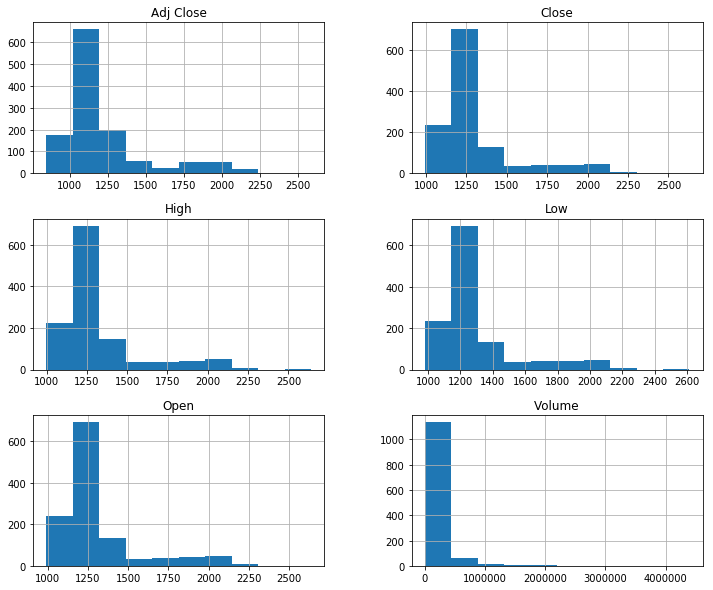

In [28]:
data.hist(figsize=(12,10))

In [29]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998595,0.998682,0.997157,0.984151,0.039656
High,0.998595,1.000000,0.998534,0.998968,0.985905,0.049232
Low,0.998682,0.998534,1.000000,0.998878,0.986194,0.033475
Close,0.997157,0.998968,0.998878,1.000000,0.987108,0.040528
Adj Close,0.984151,0.985905,0.986194,0.987108,1.000000,0.046391
Volume,0.039656,0.049232,0.033475,0.040528,0.046391,1.000000


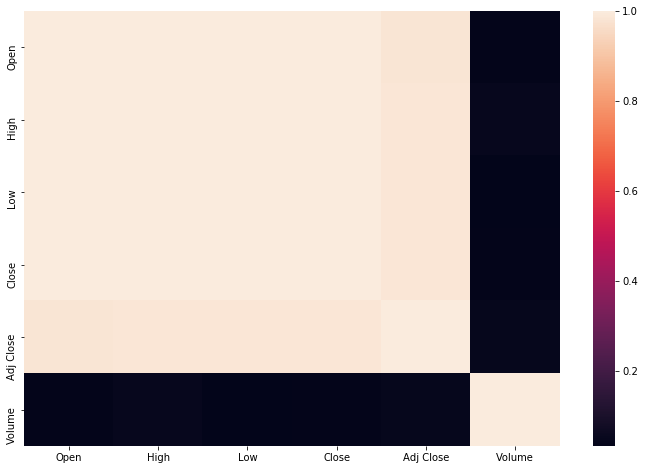

In [30]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data.corr(), fmt="f",ax=ax)

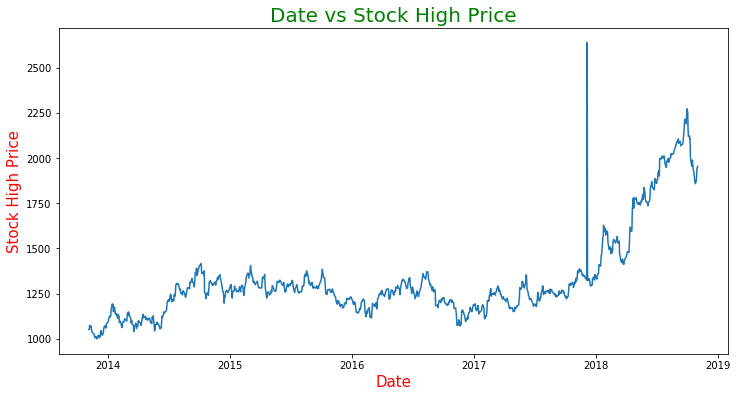

In [41]:
plt.figure(figsize=(12,6))
#Volume	Ex-Dividend	Split Ratio	Adj. Open	Adj. High	Adj. Low	Adj. Close	Adj. Volume
plt.plot(data['High'])
plt.title("Date vs Stock High Price",fontsize=20,color='g')
plt.xlabel("Date",fontsize=15,color='r')
plt.ylabel("Stock High Price",fontsize=15,color='r')
plt.show()

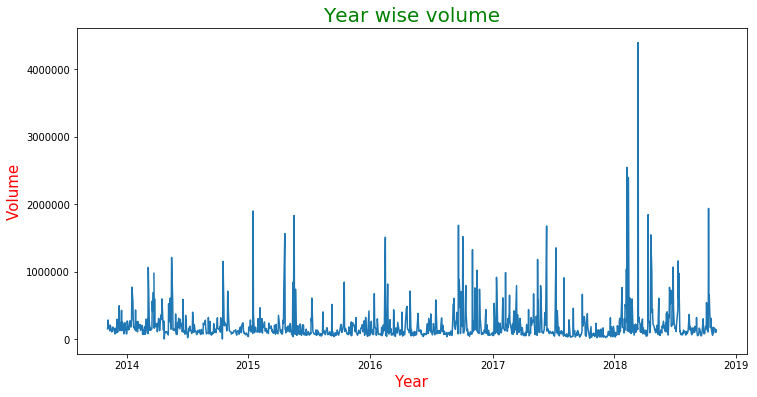

In [39]:
plt.figure(figsize=(12,6))
#Volume	Ex-Dividend	Split Ratio	Adj. Open	Adj. High	Adj. Low	Adj. Close	Adj. Volume
plt.plot(data['Volume'])
plt.title("Year wise volume",fontsize=20,color='g')
plt.xlabel("Year",fontsize=15,color='r')
plt.ylabel("Volume",fontsize=15,color='r')
plt.show()

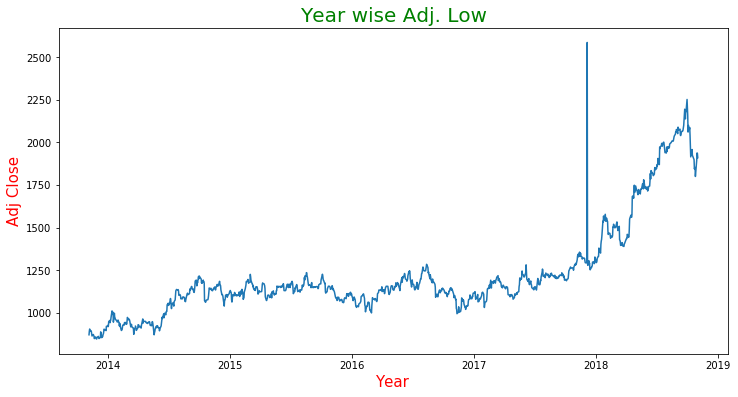

In [40]:
plt.figure(figsize=(12,6))
plt.plot(data['Adj Close'])
plt.title("Year wise Adj. Low",fontsize=20,color='g')
plt.xlabel("Year",fontsize=15,color='r')
plt.ylabel("Adj Close",fontsize=15,color='r')
plt.show()

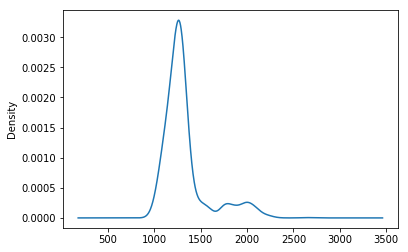

In [42]:
data['High'].plot("kde")

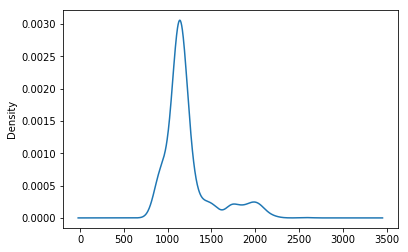

In [45]:
data['Adj Close'].plot("kde")

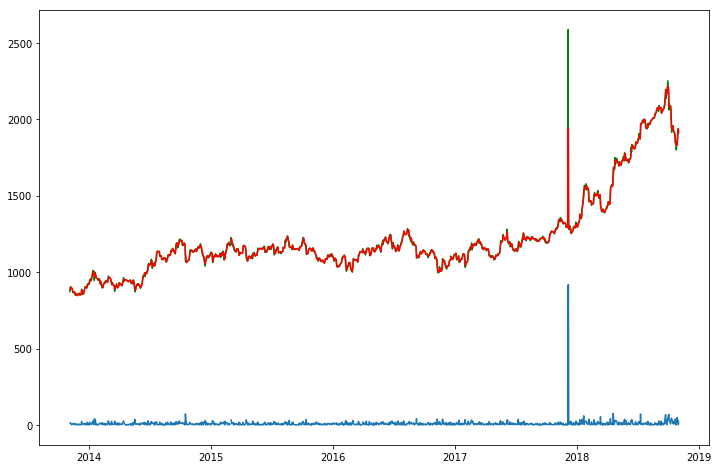

In [47]:
plt.figure(figsize=(12,8))

#gopen = data['Adj. Open']
#ghigh = data['Adj. High']
glow = data['Adj Close']
#plt.plot(gopen)
#plt.plot(ghigh,color='r')
plt.plot(glow,color='g')
plt.plot(glow.rolling(window=2).mean(),color='r')
plt.plot(glow.rolling(window=2).std())